In [22]:
from __future__ import annotations
import numpy as np
from numpy import ndarray
from matplotlib import pyplot as plt

# 第６章 確率・統計

## 6.1 確率の概念
### 6.1.1 確率とは
* 確率（Probability）: ある事象が発生することの期待の度合。
$$P(A) = \frac{a}{n}$$


### 6.1.2 余事象
* 余事象（Remaining Events）: 事象Aが起こらない場合の事象のこと
* $\bar{A}$
* $P(\bar{A}) = 1-P(A)$

### 6.1.3 確率への収束
* 試行回数が大きくなると、確率が収束することがわかる。

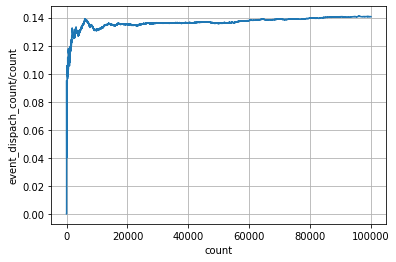

In [2]:
def L_6_1(TryCount:int):
    x = []
    y = []
    count:int = 0
    event_dispach_count:int = 0
    for i in range(TryCount):
        if np.random.randint(6+1) == 5:
            event_dispach_count += 1
        
        count += 1
        x.append(count)
        y.append(event_dispach_count/count)
    
    plt.plot(x, y)
    plt.xlabel('count')
    plt.ylabel('event_dispach_count/count')
    plt.grid()
    
    plt.show()

L_6_1(100000)

## 6.2 平均値と期待値
### 6.2.1 平均値
* $\mu = \frac{x_1 + ... + x_n}{n} = \frac{1}{n}\Sigma_{k=1}^{n}x_k$

### 6.2.2 平均値の実装

In [3]:
x = np.array([50, 40, 30, 20, 10, 2])

avg = np.average(x)
print(avg)

25.333333333333332


### 6.2.3 期待値とは
* 期待値：得られる値の「見込み」
* $E = \Sigma_{k=1}^{n}P_k x_k$
  * $x_k:k回目の試行の結果、P_k:x_kの出現確率$
* 値とその確率の総和が期待値になる。

### 6.2.4 期待値の実装

In [4]:
p = np.array([0.8, 0.15, 0.05])
x = np.array([50, 40, 30])

E = np.sum(p * x)
print(E)

47.5


### 6.2.5 平均と期待値の関係
* 導出はP.196
* 式変形により平均値と期待値は同じ意味を示す。

### 6.2.6 演習

In [7]:
p: ndarray = np.array([0.75, 0.23, 0.02]) #事象発生確率
x: ndarray = np.array([100, 500, 1000]) #確率pで得られる値

E:float = np.sum(p * x) 
print(E)

210.0


## 6.3 分散と標準偏差
* 偏差：実測値と平均値（期待値）の差(データの個数：$n$, 平均値：$\mu$, 添え字：$k$)
  * $x_k - \mu$
* 分散：$偏差^2の平均値$
  * $\frac{1}{n}\Sigma_{k=1}^{n}(x_k-\mu)^2$
  * データのばらつき具合を示す度合

### 6.3.1 分散の実装


In [2]:
sample1: ndarray = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
samle2: ndarray = np.array([num for num in range(1, 11, 3)])

variance1: float = np.var(sample1)
variance2: float = np.var(samle2)

print(variance1)
print(variance2)

8.25
11.25


### 6.3.2 標準偏差とは

* 標準偏差：$\sqrt{分散}$
  * 分散だと単位の２乗値になり元の値よりも大きくなる。そこで、分散の平方根をとることで得られる値を小さくする。
  * 単位の次元が元のデータの次元と同じになるので、ばらつき度合いとして直感的に分散よりも扱いやすい。
* 標準偏差$\sigma = \sqrt{\sigma^2} = \sqrt{\frac{1}{n}\Sigma_{k=1}{n}(x_k-\mu)^2}$ 

### 6.3.3 標準偏差の実装

In [3]:
standard_deviation: float = np.std(sample1)
standard_deviation2: float = np.std(samle2)

print(standard_deviation)
print(standard_deviation2)

2.8722813232690143
3.3541019662496847


In [4]:
x: ndarray = np.array([51, 49, 52, 48])

variance: float = np.var(x)
standard_deviation: float = np.std(x)

print(variance)
print(standard_deviation)

2.5
1.5811388300841898


## 6.4 正規分布とべき乗則

### 6.4.1 正規分布とは

* 正規分布（ガウス分布）：実世界の事象に良くあてはまる分布。
* 平均$\mu$は分布図横軸（データ値）の中心、標準偏差$\sigma$は分布の広がり具合を表す。
* 確率の世界における関数：確率密度関数。
* 正規分布を確率密度関数に変換すると、$f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$
$$f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}} = \frac{1}{\sigma\sqrt{2\pi}}\exp(-\frac{(x-\mu)^2}{2\sigma^2})$$

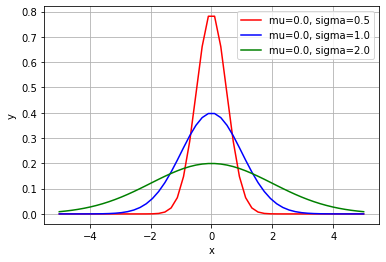

In [4]:
def gaussian_distribution(x_lin:ndarray , mu:float, sigma:float) -> float:
    return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(- (x_lin - mu) ** 2 / (2 * sigma ** 2))


def ready_to_plot(x_F, y_F, color:str, line_style:str, label:str) -> None:
    
    plt.plot(x_F, y_F, color=color, linestyle=line_style, label=label)
    
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid()
    

x: ndarray = np.linspace(-5, 5)
y1 = gaussian_distribution(x, 0.0, 0.5)
y2 = gaussian_distribution(x, 0.0, 1.0)
y3 = gaussian_distribution(x, 0.0, 2.0)

ready_to_plot(x, y1, "red", "solid", "mu=0.0, sigma=0.5")
ready_to_plot(x, y2, "blue", "solid", "mu=0.0, sigma=1.0")
ready_to_plot(x, y3, "green", "solid", "mu=0.0, sigma=2.0")

plt.show()


### 6.4.3 正規分布に従う乱数

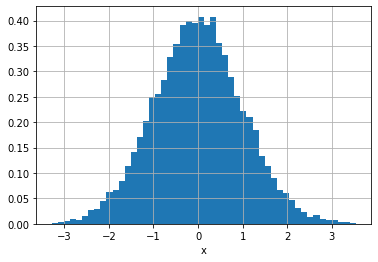

In [3]:
s: ndarray = np.random.normal(0, 1, 10000)

plt.hist(s, bins=50, density=True)
plt.xlabel("x")
plt.grid()

plt.show()

### 6.4.4 べき乗則とは
* べき乗則：$f(x) = cx^-k (c, kは定数)$
* 正規分布の親戚みたいなもん、
* 反比例の式のように、広い範囲をカバーする。
* 極端にまれな頻度の事象を扱う。

In [8]:
def power_func(x:ndarray, c:float, k:float) -> ndarray:
    return c * x ** (-k)

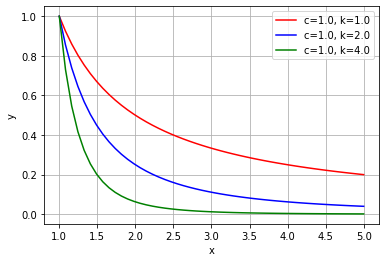

In [9]:
#s:ndarray = np.random.normal(0, 1, 10000)
x:ndarray = np.linspace(1, 5)
y1:ndarray = power_func(x, 1.0, 1.0)
y2: ndarray = power_func(x, 1.0, 2.0)
y3: ndarray = power_func(x, 1.0, 4.0)

ready_to_plot(x, y1, "red", "solid", "c=1.0, k=1.0")
ready_to_plot(x, y2, "blue", "solid", "c=1.0, k=2.0")
ready_to_plot(x, y3, "green", "solid", "c=1.0, k=4.0")
plt.legend()

plt.show()
 


### 6.4.5 べき乗則に従う乱数
* パレート分布：べき乗則に従う関数（確率密度関数）
$$f(x) = a\frac{m^a}{x^{a+1}}$$

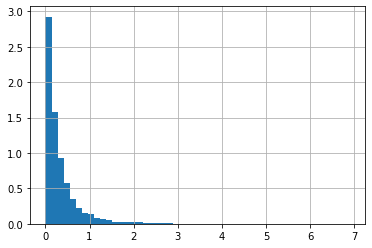

In [10]:
s:ndarray = np.random.pareto(4, 10000)
plt.hist(s, bins=50, density=True)
plt.grid()
plt.show()

### 6.4.6 演習

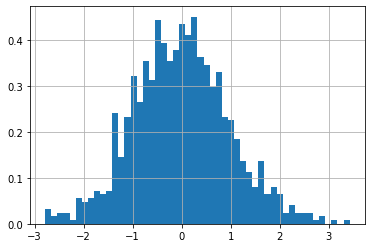

In [11]:
mu:float = 0.0
std_deviation: float = 1.0
normal: ndarray = np.random.normal(mu, std_deviation, 1000)

plt.hist(normal, bins=50, density=True)
plt.grid()
plt.show()

## 6.5 共分散
### 6.5.1 共分散とは
* 以下のような2つのデータ集合を考える。
$$X = \{x_1, x_2, ..., x_n\}$$
$$Y = \{y_1, y_2, ..., y_n\}$$
* このデータたちの共分散(Cov)は以下の式で求まる。
  * $$Cov(X, Y) = \frac{1}{n}\Sigma_{k=1}^{n}(Xの偏差)(Yの偏差) = \frac{1}{n}\Sigma_{k=1}^{n}(x_k - \mu_X)(y_k - \mu_Y) $$

* 共分散が大きい:$X, Y$に相関がある。$Xが変化すれば、その分Yも変化する。$
* 共分散が0に近い:$X, Y$に相関がない。
* 共分散が小さい:$X, Y$に相関がある。$X$の変化と逆方向に$Y$は変化する。

-280.0
160.0
-320.0


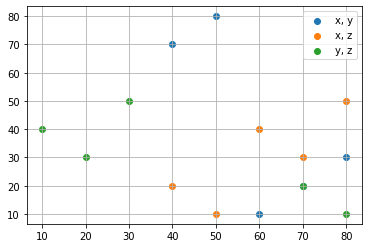

In [13]:
from numpy import floating
def covariance(x:ndarray, y:ndarray) -> floating:
    deviationX = x-np.average(x)
    deviationY = y-np.average(y)
    return np.average(deviationX * deviationY)

x: ndarray = np.array([50 ,40, 70, 60, 80])
y: ndarray = np.array([80, 70, 20, 10, 30])
z: ndarray = np.array([10, 20, 30, 40, 50])

cov_xy = covariance(x, y)
cov_xz = covariance(x, z)
cov_yz = covariance(y, z)

print(cov_xy)
print(cov_xz)
print(cov_yz)
plt.scatter(x, y, label="x, y")
plt.scatter(x, z, label="x, z")
plt.scatter(y, z, label="y, z")
plt.legend()
plt.grid()
plt.show()

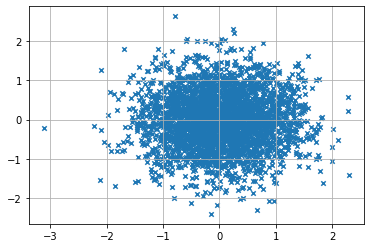

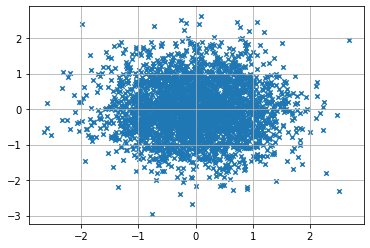

C:\Users\syuku\AppData\Local\Temp\ipykernel_33772\2931348732.py:8: RuntimeWarning: covariance is not positive-semidefinite.
  random_data: ndarray = np.random.multivariate_normal(avg, cov_matx, 3000)


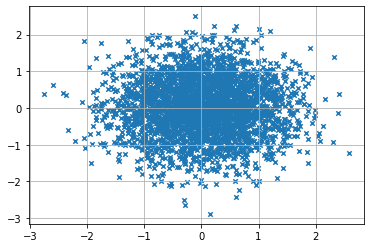

In [15]:
def generate_cov(cov:float) -> None:
    avg: ndarray = np.array([0.0, 0.0])
    cov_matx: ndarray = np.array([
        [cov, 0.0], 
        [0.0, cov]
    ])
    
    random_data: ndarray = np.random.multivariate_normal(avg, cov_matx, 3000)
    
    x = random_data[:, 0]
    y = random_data[:, 1]
    
    plt.scatter(x, y, marker="x", s=20)
    
    plt.grid()
    plt.show()
    
generate_cov(0.5)
generate_cov(0.6)
generate_cov(-0.6)
    

### 6.5.5 演習

380.0


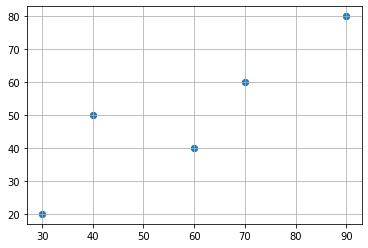

In [16]:
x: ndarray = np.array([30, 70, 40, 60, 90])
y: ndarray = np.array([20, 60, 50, 40, 80])

cov_xy:floating = covariance(x, y)
print(cov_xy)

plt.scatter(x, y, label="x, y", s=40)
plt.grid()

plt.show()



## 6.6 相関係数
### 6.6.1 相関係数とは
* 以下のような2つのデータ集合を考える。
$$X = \{x_1, x_2, ..., x_n\}$$
$$Y = \{y_1, y_2, ..., y_n\}$$
* 標準偏差を$\sigma_X, \sigma_Y$, 共分散を$Cov(X, Y)$とする。
$$p = \frac{Cov(X, Y)}{\sigma_X \sigma_Y}$$
$$-1 <= p <= 1$$


* 相関係数が正：$X$の変化に比喩的に比例して$Y$も変化する。
* 相関係数が負：$X$の変化に比喩的に反比例して$Y$は逆の変化をする。
* 相関係数が0：$X$と$Y$は相関がない。

### 6.6.3 Pythonで相関係数を求める。


In [18]:
x: ndarray = np.array([50, 70, 40, 60, 80])
y: ndarray = np.array([60, 80, 50, 50, 70])

print("相関係数")
print(np.corrcoef(x, y))

相関係数
[[1.         0.72760688]
 [0.72760688 1.        ]]


### 6.6.4 演習

In [19]:
x: ndarray = np.array([30 ,70, 40, 60, 90])
y: ndarray = np.array([20, 60, 50, 40, 80])

print("correctof()")
print(np.corrcoef(x, y))

cov: floating = covariance(x, y) #偏差同士の掛け算平均
x_std: float = np.std(x)
y_std: float = np.std(y)

print("手計算")
print(cov / (x_std * y_std))


correctof()
[[1.         0.88975652]
 [0.88975652 1.        ]]
手計算
0.8897565210026094


## 6.7 条件付き確率とベイズの定理
* この章では、事象$A$を「原因」、事象$B$を「結果」として考える。


### 6.7.1 条件付き確率とは
* ２つの事象$A,B$を考える
* 条件付き確率：$B$が発生した後に$A$が発生する確率。
$$P(A|B) = \frac{P(A\cap B)}{P(B)}$$
* $P(A\cap B)$は$A$と$B$が同時に発生する確率。(場合の数$B$のうち、$A$が発生する確率)
* すなわち、条件付き確率は「原因から結果を予測する（原因→結果）」といえる。

### 6.7.3 ベイズの定理とは
* 条件付確率の逆
  * 結果から原因を予測する（結果→原因）
$$P(B|A) = \frac{P(A|B)P(B)}{P(A)}$$
* $P(B)$:事前確率
* $P(B|A)$:事後確率
と呼ばれる。
* ベイズの定理はその式から、事前確率を事後確率に変換する式ともいわれる。
* パラメータの推定に利用される事がある。

### 6.7.5 演習

* 問題：とりだした白玉が0である確率
* A:0である場合
* B:白い玉である場合

* 玉の合計：6個（白3(0,0,1),黒3(0,1,1)）
* $P(B) = \frac{3}{6} = \frac{1}{2}$
* $P(A \cap B) = \frac{2}{6} = \frac{1}{3}$
* 条件付き確率の式より、
* $P(A|B) = \frac{P(A \cap B)}{P(B)} = \frac{1/3}{1/2} = \frac{1}{3} \times 2 = \frac{2}{3}$

## 6.8 尤度（ゆうど）
ある結果から、「どのような前提条件があったと推測するのが妥当なのか」を教えてくれる指標
### 6.8.1 尤度とは
* 尤度：すべての確率の積
  * 次の$n個$のデータを用意する。
    * $x_1, x_2, ...., x_n$
  * これらの発生する確率を、
    * $p(x_1), p(x_2), ..., p(x_n)$
  * このとき、各確率をすべてかけたものを尤度と呼ぶ。
  $$p(x_1)p(x_2)...p(x_n) = \Pi_{k=1}^{n}p(x_k)$$

* （復習：正規分布）
  * 平均値$\mu$, 標準偏差$\sigma$とすると、
  * $p(x) = \frac{1}{\sigma \sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$

x len:  6
x __len__:  6


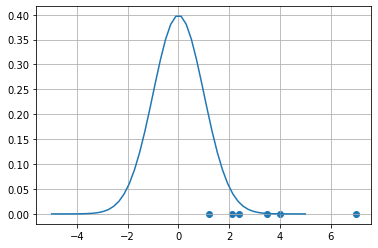

In [21]:

x: ndarray = np.array([2.4, 1.2, 3.5, 2.1, 4,7])
print("x len: ", len(x))
print("x __len__: ", x.__len__())
y_zero: ndarray = np.zeros(x.__len__())

mu: float = 0.0
sigma: float = 1.0

def gaussian_distribution(x:ndarray, mu:float|floating, sigma:float|floating) -> ndarray:
    return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))

x_pdf: ndarray = np.linspace(-5, 5)
y_pdf: ndarray = gaussian_distribution(x_pdf, mu, sigma)

plt.scatter(x, y_zero, label="x, y")
plt.plot(x_pdf, y_pdf, label="pdf")

plt.grid()
plt.show()


x len:  6
x __len__:  6


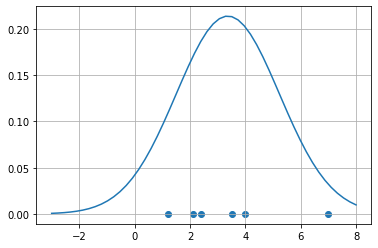

In [25]:
x: ndarray = np.array([2.4, 1.2, 3.5, 2.1, 4,7])
print("x len: ", len(x))
print("x __len__: ", x.__len__())
y_zero: ndarray = np.zeros(x.__len__())

mu: floating = np.average(x)
sigma: floating = np.std(x)

def gaussian_distribution(x:ndarray, mu:float, sigma:float) -> ndarray:
    return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))

x_pdf: ndarray = np.linspace(-3, 8)
y_pdf: ndarray = gaussian_distribution(x_pdf, mu, sigma)

plt.scatter(x, y_zero, label="x, y")
plt.plot(x_pdf, y_pdf, label="pdf")

plt.grid()
plt.show()


### 6.8.4 尤度とパラメータ